In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# load data

In [2]:
(x_train_orig,y_train_orig),(x_test_orig,y_test_orig)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


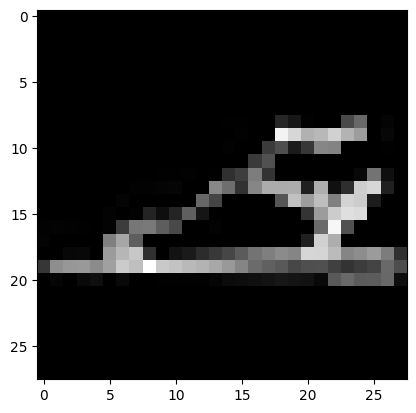

In [4]:
plt.imshow(x_train_orig[300],cmap='gray')

In [ ]:
x_train_orig.shape

(60000, 28, 28)

In [ ]:
y_train_orig.shape

(60000,)

In [ ]:
x_test_orig.shape


(10000, 28, 28)

In [ ]:
y_test_orig.shape

(10000,)

In [5]:
x_train = x_train_orig.astype('float32')
x_test = x_test_orig.astype ('float32')
# normalize
x_train /= 255
x_test /= 255

In [6]:
# One Hot
y_train = keras.utils.to_categorical(y_train_orig,num_classes=10)
y_test = keras.utils.to_categorical(y_test_orig,num_classes=10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
# vectorize
X_train = np.reshape (x_train,[-1,28*28])
X_test = np.reshape (x_test,[-1,28*28])

In [8]:
X_train.shape

(60000, 784)

# build amodel

In [9]:
model1= Sequential()
model1.add(Dense(128,activation = 'relu',input_dim= 784))
model1.add(Dropout(0.5))
model1.add(Dense(64,activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# compile model

In [11]:
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [12]:
history = model1.fit(X_train,y_train, epochs=100 , batch_size=64, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5905 - loss: 1.1340 - val_accuracy: 0.8253 - val_loss: 0.4821
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7860 - loss: 0.6163 - val_accuracy: 0.8397 - val_loss: 0.4592
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8134 - loss: 0.5464 - val_accuracy: 0.8520 - val_loss: 0.4186
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8228 - loss: 0.5262 - val_accuracy: 0.8553 - val_loss: 0.4160
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8286 - loss: 0.5115 - val_accuracy: 0.8579 - val_loss: 0.4120
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8361 - loss: 0.5023 - val_accuracy: 0.8620 - val_loss: 0.4132
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8351 - loss: 0.5073 - val_accuracy: 0.8617 - val_loss: 0.4169
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8367 - loss: 0.4965 - val_accu

In [13]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

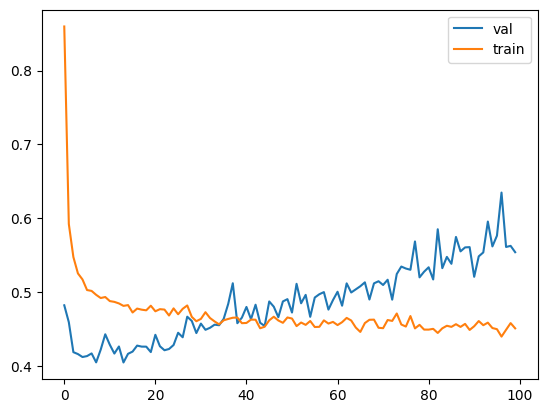

In [14]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

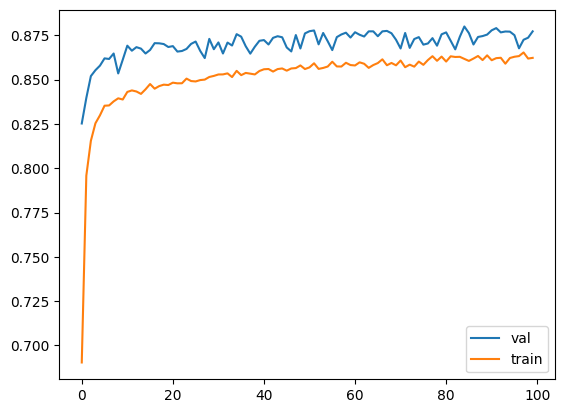

In [16]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

In [17]:
loss , acc = model1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8736 - loss: 0.5994


In [18]:
predicted = model1.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
predicted_classes = np.argmax(predicted, axis =1)

In [20]:
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_orig)

predicted:
[9 2 1 ... 8 1 5]
True Label:
[9 2 1 ... 8 1 5]


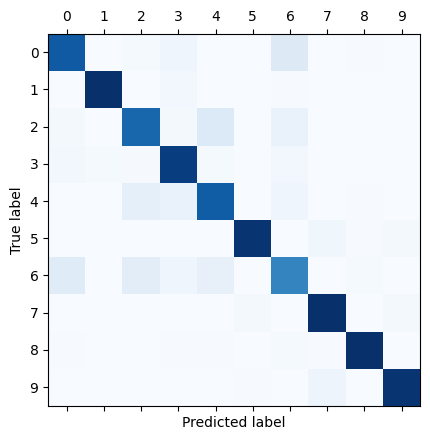

In [22]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_orig, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");